**数据集说明**

四个数据集：
1. 客户个人信息.csv：包含客户的基本信息
2. 贷款申请信息.csv：包含客户申请贷款时获取的相关记录
3. 贷款历史记录.csv：包含客户的历史贷款申请记录
4. 还款历史记录.csv：包含客户的历史贷款还款记录


## 第一部分 数据导入和观测

**1. 环境搭建** 

In [287]:
# import packages 导入库，搭建环境
import numpy as np  # 训练题 2分
import pandas as pd  
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# ignore warnings 可以删除
import warnings
warnings.filterwarnings('ignore')
# 为了让matplotlib里显示中文字符
import matplotlib.font_manager as fm 
matplotlib.rcParams['font.family'] = 'Microsoft Yahei' # 设置字体

%matplotlib inline

**2.导入数据集**

In [288]:
data_customer = pd.read_csv('客户个人信息.csv')
data_customer.head() 

,SK_ID_CURR,CODE_GENDER,DAYS_BIRTH,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,DAYS_EMPLOYED,OCCUPATION_TYPE,ORGANIZATION_TYPE,AMT_INCOME_TOTAL,CNT_FAM_MEMBERS,CNT_CHILDREN
0,100004,M,-19046,Secondary / secondary special,Single / not married,-225,Laborers,Government,67500.0,1.0,0
1,100016,F,-13439,Secondary / secondary special,Married,-2717,Laborers,Business Entity Type 2,67500.0,2.0,0
2,100030,F,-19334,Secondary / secondary special,Married,-3494,Cleaning staff,Business Entity Type 3,90000.0,2.0,0
3,100037,F,-12974,Secondary / secondary special,Civil marriage,-4404,Laborers,Business Entity Type 2,90000.0,2.0,0
4,100072,M,-7907,Incomplete higher,Single / not married,-1324,Sales staff,Trade: type 2,180000.0,1.0,0


In [289]:
data_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24661 entries, 0 to 24660
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SK_ID_CURR           24661 non-null  int64  
 1   CODE_GENDER          24661 non-null  object 
 2   DAYS_BIRTH           24661 non-null  int64  
 3   NAME_EDUCATION_TYPE  24661 non-null  object 
 4   NAME_FAMILY_STATUS   24661 non-null  object 
 5   DAYS_EMPLOYED        24661 non-null  int64  
 6   OCCUPATION_TYPE      16988 non-null  object 
 7   ORGANIZATION_TYPE    24661 non-null  object 
 8   AMT_INCOME_TOTAL     24661 non-null  float64
 9   CNT_FAM_MEMBERS      24660 non-null  float64
 10  CNT_CHILDREN         24661 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 2.1+ MB


In [290]:
data_credit = pd.read_csv('贷款申请信息.csv')
data_credit.head() 

,SK_ID_CURR,TARGET,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_CREDIT,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,291787,0,N,Y,592560.0,1,1,0,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0
1,187132,0,N,Y,679500.0,1,1,1,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0
2,113892,0,N,Y,675000.0,1,1,0,1,0,0,0.0,0.0,0.0,0.0,0.0,3.0
3,280634,1,N,N,450000.0,1,0,0,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0
4,121672,0,N,Y,314100.0,1,1,0,1,0,0,0.0,0.0,0.0,0.0,1.0,0.0


In [291]:
data_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13439 entries, 0 to 13438
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SK_ID_CURR                  13439 non-null  int64  
 1   TARGET                      13439 non-null  int64  
 2   FLAG_OWN_CAR                13439 non-null  object 
 3   FLAG_OWN_REALTY             13439 non-null  object 
 4   AMT_CREDIT                  13439 non-null  float64
 5   FLAG_MOBIL                  13439 non-null  int64  
 6   FLAG_EMP_PHONE              13439 non-null  int64  
 7   FLAG_WORK_PHONE             13439 non-null  int64  
 8   FLAG_CONT_MOBILE            13439 non-null  int64  
 9   FLAG_PHONE                  13439 non-null  int64  
 10  FLAG_EMAIL                  13439 non-null  int64  
 11  AMT_REQ_CREDIT_BUREAU_HOUR  11611 non-null  float64
 12  AMT_REQ_CREDIT_BUREAU_DAY   11611 non-null  float64
 13  AMT_REQ_CREDIT_BUREAU_WEEK  116

In [292]:
data_application = pd.read_csv('previous_application.csv')
data_application.head() 

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [293]:
data_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [294]:
data_payment = pd.read_csv('installments_payments.csv')
data_payment.head() 

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [295]:
data_payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


**3.合并数据集**

将客户个人信息与贷款申请信息合并。历史记录的两张表数据量显著大于客户信息，存在一对多情况，故不做合并。

In [296]:
data = pd.merge(data_customer, data_credit, on = 'SK_ID_CURR', how = 'inner')
data.head()

,SK_ID_CURR,CODE_GENDER,DAYS_BIRTH,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,DAYS_EMPLOYED,OCCUPATION_TYPE,ORGANIZATION_TYPE,AMT_INCOME_TOTAL,CNT_FAM_MEMBERS,...,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100030,F,-19334,Secondary / secondary special,Married,-3494,Cleaning staff,Business Entity Type 3,90000.0,2.0,...,0,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100037,F,-12974,Secondary / secondary special,Civil marriage,-4404,Laborers,Business Entity Type 2,90000.0,2.0,...,1,1,0,0,0.0,0.0,0.0,0.0,0.0,2.0
2,100072,M,-7907,Incomplete higher,Single / not married,-1324,Sales staff,Trade: type 2,180000.0,1.0,...,0,1,0,1,0.0,0.0,0.0,0.0,0.0,4.0
3,100085,M,-11187,Secondary / secondary special,Married,-2224,Drivers,Business Entity Type 1,157500.0,3.0,...,1,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100139,F,-13286,Secondary / secondary special,Married,-2305,NaN,Business Entity Type 3,157500.0,3.0,...,0,1,0,1,0.0,0.0,1.0,0.0,0.0,3.0


In [297]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13439 entries, 0 to 13438
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SK_ID_CURR                  13439 non-null  int64  
 1   CODE_GENDER                 13439 non-null  object 
 2   DAYS_BIRTH                  13439 non-null  int64  
 3   NAME_EDUCATION_TYPE         13439 non-null  object 
 4   NAME_FAMILY_STATUS          13439 non-null  object 
 5   DAYS_EMPLOYED               13439 non-null  int64  
 6   OCCUPATION_TYPE             9249 non-null   object 
 7   ORGANIZATION_TYPE           13439 non-null  object 
 8   AMT_INCOME_TOTAL            13439 non-null  float64
 9   CNT_FAM_MEMBERS             13439 non-null  float64
 10  CNT_CHILDREN                13439 non-null  int64  
 11  TARGET                      13439 non-null  int64  
 12  FLAG_OWN_CAR                13439 non-null  object 
 13  FLAG_OWN_REALTY             134

## 第二部分 数据清洗和预处理

**1. 数据清洗（删除重复项）**

In [298]:
# 检查重复项
print('去重前数据维度:', data.shape)
duplicates = data.duplicated()
print('重复行数：', duplicates.sum())

去重前数据维度: (13439, 27)
重复行数： 162


In [299]:
data[duplicates]

,SK_ID_CURR,CODE_GENDER,DAYS_BIRTH,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,DAYS_EMPLOYED,OCCUPATION_TYPE,ORGANIZATION_TYPE,AMT_INCOME_TOTAL,CNT_FAM_MEMBERS,...,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
333,109138,F,-12490,Higher education,Separated,-128,NaN,Business Entity Type 2,135000.0,2.0,...,1,1,0,0,0.0,0.0,0.0,0.0,2.0,1.0
344,109343,M,-20788,Higher education,Married,-2086,Managers,Business Entity Type 3,202500.0,2.0,...,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0
445,112436,F,-14516,Secondary / secondary special,Married,-1351,Laborers,Postal,90000.0,4.0,...,0,1,0,0,0.0,0.0,0.0,0.0,0.0,2.0
530,114130,F,-15261,Incomplete higher,Separated,-1685,Waiters/barmen staff,Restaurant,90000.0,1.0,...,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0
600,115788,F,-10315,Secondary / secondary special,Married,-1209,Core staff,Government,103500.0,3.0,...,0,1,0,0,0.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13083,446420,F,-20367,Secondary / secondary special,Civil marriage,365243,NaN,XNA,157500.0,2.0,...,0,1,1,0,0.0,0.0,0.0,1.0,0.0,0.0
13101,446937,F,-15187,Secondary / secondary special,Married,-2610,Sales staff,Trade: type 6,112500.0,2.0,...,1,1,1,0,0.0,0.0,0.0,1.0,0.0,2.0
13283,452016,F,-10517,Higher education,Married,-2811,Laborers,Industry: type 11,184500.0,2.0,...,0,1,1,0,0.0,0.0,0.0,1.0,0.0,5.0
13355,454081,M,-23145,Secondary / secondary special,Married,365243,NaN,XNA,112500.0,2.0,...,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [300]:
# 去重
data = data.drop_duplicates()
data.head()

,SK_ID_CURR,CODE_GENDER,DAYS_BIRTH,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,DAYS_EMPLOYED,OCCUPATION_TYPE,ORGANIZATION_TYPE,AMT_INCOME_TOTAL,CNT_FAM_MEMBERS,...,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100030,F,-19334,Secondary / secondary special,Married,-3494,Cleaning staff,Business Entity Type 3,90000.0,2.0,...,0,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100037,F,-12974,Secondary / secondary special,Civil marriage,-4404,Laborers,Business Entity Type 2,90000.0,2.0,...,1,1,0,0,0.0,0.0,0.0,0.0,0.0,2.0
2,100072,M,-7907,Incomplete higher,Single / not married,-1324,Sales staff,Trade: type 2,180000.0,1.0,...,0,1,0,1,0.0,0.0,0.0,0.0,0.0,4.0
3,100085,M,-11187,Secondary / secondary special,Married,-2224,Drivers,Business Entity Type 1,157500.0,3.0,...,1,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100139,F,-13286,Secondary / secondary special,Married,-2305,NaN,Business Entity Type 3,157500.0,3.0,...,0,1,0,1,0.0,0.0,1.0,0.0,0.0,3.0


In [301]:
#打印去重后的数据维度,描述打印结果，填写代码。3分
print('去重后的数据维度:', data.shape)
duplicates = data.duplicated()
print('重复行数：', duplicates.sum())

去重后的数据维度: (13277, 27)
重复行数： 0


**2. 选取目标字段** 

In [302]:
list(data.columns) # 打印全部字段名称

['SK_ID_CURR',
 'CODE_GENDER',
 'DAYS_BIRTH',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'DAYS_EMPLOYED',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE',
 'AMT_INCOME_TOTAL',
 'CNT_FAM_MEMBERS',
 'CNT_CHILDREN',
 'TARGET',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'AMT_CREDIT',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [303]:
# 合并查询字段
data['AMT_REQ_CREDIT_BUREAU'] = data['AMT_REQ_CREDIT_BUREAU_HOUR'] + data['AMT_REQ_CREDIT_BUREAU_DAY'] + data['AMT_REQ_CREDIT_BUREAU_WEEK'] + data['AMT_REQ_CREDIT_BUREAU_MON'] + data['AMT_REQ_CREDIT_BUREAU_QRT'] + data['AMT_REQ_CREDIT_BUREAU_YEAR']

In [304]:
# 选取目标字段
data = data[['SK_ID_CURR',
             'CODE_GENDER',
             'DAYS_BIRTH',
             'NAME_EDUCATION_TYPE',
             'NAME_FAMILY_STATUS',
             'DAYS_EMPLOYED',
             'OCCUPATION_TYPE',
             'AMT_INCOME_TOTAL',
             'CNT_FAM_MEMBERS',
             'TARGET',
             'FLAG_OWN_CAR',
             'FLAG_OWN_REALTY',
             'AMT_CREDIT',
             'AMT_REQ_CREDIT_BUREAU']]
data.head()

,SK_ID_CURR,CODE_GENDER,DAYS_BIRTH,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,DAYS_EMPLOYED,OCCUPATION_TYPE,AMT_INCOME_TOTAL,CNT_FAM_MEMBERS,TARGET,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_CREDIT,AMT_REQ_CREDIT_BUREAU
0,100030,F,-19334,Secondary / secondary special,Married,-3494,Cleaning staff,90000.0,2.0,0,N,Y,225000.0,0.0
1,100037,F,-12974,Secondary / secondary special,Civil marriage,-4404,Laborers,90000.0,2.0,0,N,N,199008.0,2.0
2,100072,M,-7907,Incomplete higher,Single / not married,-1324,Sales staff,180000.0,1.0,0,N,N,1080000.0,4.0
3,100085,M,-11187,Secondary / secondary special,Married,-2224,Drivers,157500.0,3.0,0,N,Y,755190.0,0.0
4,100139,F,-13286,Secondary / secondary special,Married,-2305,NaN,157500.0,3.0,0,N,N,302341.5,4.0


**3. 缺失项处理** 

In [305]:
# 查看缺失值比例
(data.isnull().sum() / data.shape[0]) * 100 

SK_ID_CURR                0.000000
CODE_GENDER               0.000000
DAYS_BIRTH                0.000000
NAME_EDUCATION_TYPE       0.000000
NAME_FAMILY_STATUS        0.000000
DAYS_EMPLOYED             0.000000
OCCUPATION_TYPE          31.129020
AMT_INCOME_TOTAL          0.000000
CNT_FAM_MEMBERS           0.000000
TARGET                    0.000000
FLAG_OWN_CAR              0.000000
FLAG_OWN_REALTY           0.000000
AMT_CREDIT                0.000000
AMT_REQ_CREDIT_BUREAU    13.579875
dtype: float64

In [306]:
data['OCCUPATION_TYPE'].fillna('Unknown', inplace = True)
data['AMT_REQ_CREDIT_BUREAU'].fillna(-1, inplace = True)

In [307]:
data.dropna(subset=['CNT_FAM_MEMBERS'], inplace=True)

In [308]:
data.isnull().sum()  # 确认已经移除所有缺失值

SK_ID_CURR               0
CODE_GENDER              0
DAYS_BIRTH               0
NAME_EDUCATION_TYPE      0
NAME_FAMILY_STATUS       0
DAYS_EMPLOYED            0
OCCUPATION_TYPE          0
AMT_INCOME_TOTAL         0
CNT_FAM_MEMBERS          0
TARGET                   0
FLAG_OWN_CAR             0
FLAG_OWN_REALTY          0
AMT_CREDIT               0
AMT_REQ_CREDIT_BUREAU    0
dtype: int64

**4. 数据格式检查和转换** 

In [309]:
# 检查 受教育程度 的格式
data['NAME_EDUCATION_TYPE'].unique()

array(['Secondary / secondary special', 'Incomplete higher',
       'Higher education', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [310]:
data['NAME_EDUCATION_TYPE'].replace('Academic degree', 'Higher education', inplace = True)
data['NAME_EDUCATION_TYPE'].unique()

array(['Secondary / secondary special', 'Incomplete higher',
       'Higher education', 'Lower secondary'], dtype=object)

In [311]:
# 检查 婚姻状况 的格式
data['NAME_FAMILY_STATUS'].unique()

array(['Married', 'Civil marriage', 'Single / not married', 'Separated',
       'Widow'], dtype=object)

In [312]:
data['NAME_FAMILY_STATUS'].replace('Civil marriage', 'Married', inplace = True)
data['NAME_FAMILY_STATUS'].unique()

array(['Married', 'Single / not married', 'Separated', 'Widow'],
      dtype=object)

In [313]:
# 将布尔值转换为整数值
data['FLAG_OWN_CAR'].replace({'Y': 1, 'N': 0}, inplace = True)
data['FLAG_OWN_REALTY'].replace({'Y': 1, 'N': 0}, inplace = True)

In [314]:
# 将天转换为年
data['YEARS_BIRTH'] = data['DAYS_BIRTH'] / -365
data['YEARS_EMPLOYED'] = data['DAYS_EMPLOYED'] / -365

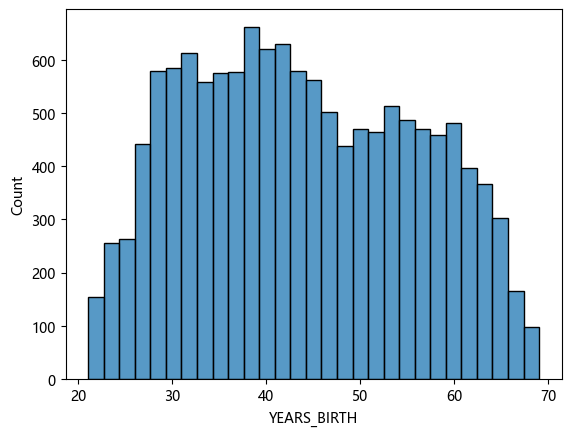

In [315]:
# 检查年龄分布，根据分布分箱
sns.histplot(data['YEARS_BIRTH']);

<AxesSubplot:xlabel='AGE_BINNED', ylabel='count'>

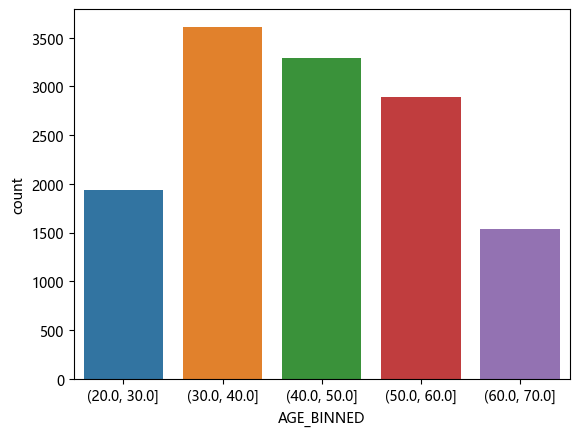

In [316]:
# 将年龄按每10岁分箱
data['AGE_BINNED'] = pd.cut(data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 6))
data['AGE_BINNED'] = data['AGE_BINNED'].astype(str)
age_order = ['(20.0, 30.0]', '(30.0, 40.0]', '(40.0, 50.0]', '(50.0, 60.0]', '(60.0, 70.0]']
data['AGE_BINNED'] = pd.Categorical(data['AGE_BINNED'], categories = age_order)
sns.countplot(data['AGE_BINNED'])

In [262]:
# 去除无用字段
data.drop(columns=['YEARS_BIRTH', 'DAYS_BIRTH', 'DAYS_EMPLOYED'], inplace=True)

**5. 异常值检查与处理** 

In [263]:
# 查看变量的分布
data.describe()

,SK_ID_CURR,AMT_INCOME_TOTAL,CNT_FAM_MEMBERS,TARGET,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_CREDIT,AMT_REQ_CREDIT_BUREAU,YEARS_EMPLOYED
count,13277.000000,1.327700e+04,13277.000000,13277.000000,13277.000000,13277.000000,1.327700e+04,13277.000000,13277.000000
mean,279154.771710,1.688998e+05,2.154176,0.083829,0.339007,0.687731,5.943545e+05,2.045266,-173.312686
std,102692.714734,1.006715e+05,0.905084,0.277142,0.473390,0.463436,3.977950e+05,3.302329,385.825710
min,100030.000000,2.700000e+04,1.000000,0.000000,0.000000,0.000000,4.500000e+04,-1.000000,-1000.665753
25%,190497.000000,1.125000e+05,2.000000,0.000000,0.000000,0.000000,2.700000e+05,0.000000,0.786301
50%,280261.000000,1.485000e+05,2.000000,0.000000,0.000000,1.000000,5.084955e+05,2.000000,3.284932
75%,367880.000000,2.025000e+05,3.000000,0.000000,1.000000,1.000000,8.086500e+05,3.000000,7.564384
max,456248.000000,3.600000e+06,14.000000,1.000000,1.000000,1.000000,2.931660e+06,262.000000,45.073973


In [264]:
# 工资 借贷跨度过大，采用log转换
data['AMT_INCOME_TOTAL_log'] = np.log(data['AMT_INCOME_TOTAL'])
data['AMT_CREDIT_log'] = np.log(data['AMT_CREDIT'])
data[['AMT_INCOME_TOTAL_log', 'AMT_CREDIT_log']].describe()

,AMT_INCOME_TOTAL_log,AMT_CREDIT_log
count,13277.000000,13277.000000
mean,11.912819,13.065400
std,0.488021,0.707515
min,10.203592,10.714418
25%,11.630709,12.506177
50%,11.908340,13.139212
75%,12.218495,13.603121
max,15.096444,14.891079


In [265]:
# 根据百分位数查看查询记录
data['AMT_REQ_CREDIT_BUREAU'].quantile(q=np.linspace(0.9, 1, 11))

0.90      5.0
0.91      5.0
0.92      6.0
0.93      6.0
0.94      6.0
0.95      7.0
0.96      7.0
0.97      7.0
0.98      8.0
0.99      9.0
1.00    262.0
Name: AMT_REQ_CREDIT_BUREAU, dtype: float64

In [266]:
# 选取前97%的数据
data = data[data['AMT_REQ_CREDIT_BUREAU'].le(7)]
data['AMT_REQ_CREDIT_BUREAU'].describe()

count    12893.000000
mean         1.810130
std          2.058846
min         -1.000000
25%          0.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: AMT_REQ_CREDIT_BUREAU, dtype: float64

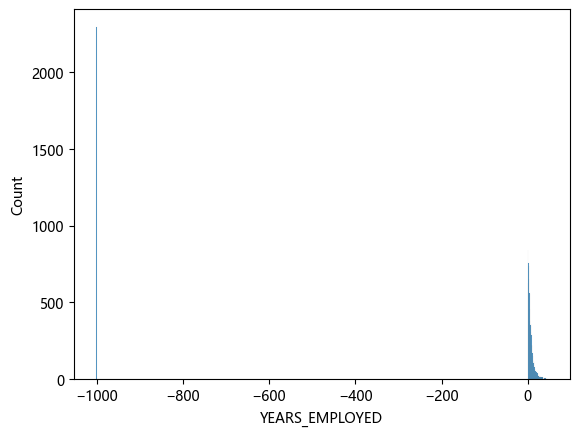

In [267]:
# 画图查看工龄分布
sns.histplot(data['YEARS_EMPLOYED']);
# 后续分为两组处理

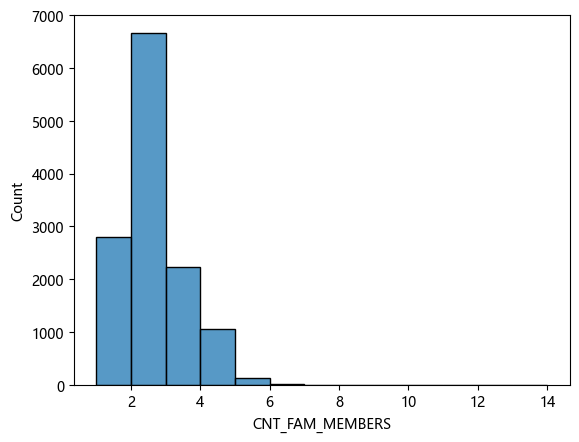

In [268]:
# 画图查看家庭成员数
sns.histplot(data['CNT_FAM_MEMBERS'], binwidth=1);
# 后续分为两组处理

In [269]:
# 去除大于等于7的数据
data = data[data['CNT_FAM_MEMBERS'].lt(7)]

In [270]:
data.head()

,SK_ID_CURR,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,OCCUPATION_TYPE,AMT_INCOME_TOTAL,CNT_FAM_MEMBERS,TARGET,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_CREDIT,AMT_REQ_CREDIT_BUREAU,YEARS_EMPLOYED,AGE_BINNED,AMT_INCOME_TOTAL_log,AMT_CREDIT_log
0,100030,F,Secondary / secondary special,Married,Cleaning staff,90000.0,2.0,0,0,1,225000.0,0.0,9.572603,"(50.0, 60.0]",11.407565,12.323856
1,100037,F,Secondary / secondary special,Married,Laborers,90000.0,2.0,0,0,0,199008.0,2.0,12.065753,"(30.0, 40.0]",11.407565,12.201100
2,100072,M,Incomplete higher,Single / not married,Sales staff,180000.0,1.0,0,0,0,1080000.0,4.0,3.627397,"(20.0, 30.0]",12.100712,13.892472
3,100085,M,Secondary / secondary special,Married,Drivers,157500.0,3.0,0,0,1,755190.0,0.0,6.093151,"(30.0, 40.0]",11.967181,13.534725
4,100139,F,Secondary / secondary special,Married,Unknown,157500.0,3.0,0,0,0,302341.5,4.0,6.315068,"(30.0, 40.0]",11.967181,12.619312


## 第三部分 用户画像分析

**1. 整体逾期分析** 

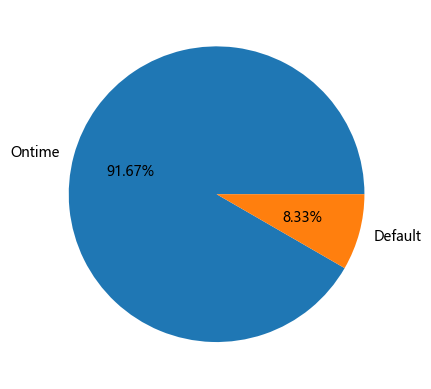

In [271]:
# 计算对应客户数量
ontime = data[data['TARGET'] == 0].shape[0]
default = data[data['TARGET'] == 1].shape[0]

# 总客户数
total = [ontime, default]

# 标签
label = ['Ontime', 'Default']

# 绘制饼图
plt.pie(total, labels = label, autopct = '%1.2f%%');

**2. 类别变量分析** 

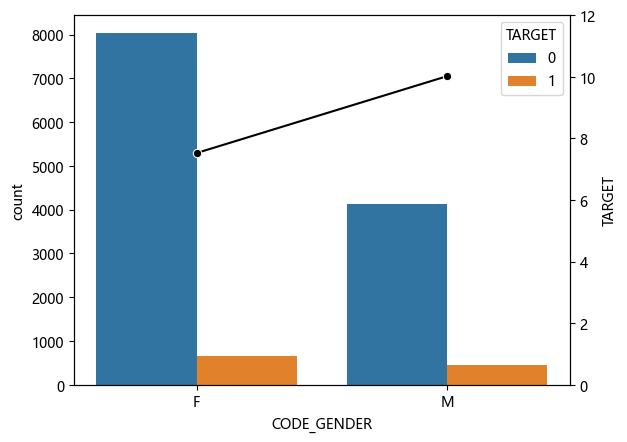

In [317]:
# 性别
gender_plt = (data[['TARGET', 'CODE_GENDER']].groupby('CODE_GENDER').mean() * 100).reset_index()
sns.countplot(x = 'CODE_GENDER', hue = 'TARGET', data = data)
ax = plt.gca()
ax2 = ax.twinx()
ax2 = sns.lineplot(x = 'CODE_GENDER', y = 'TARGET', data = gender_plt, color = 'black', marker = 'o')
plt.ylim([0, 12]);

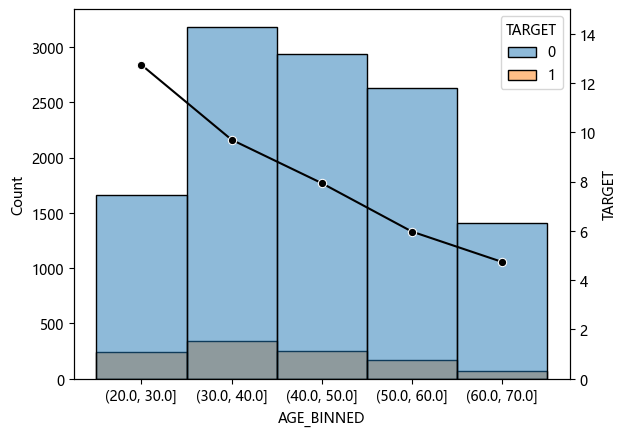

In [273]:
# 年龄
age_plt = (data[['TARGET', 'AGE_BINNED']].groupby('AGE_BINNED').mean() * 100).reset_index()
sns.histplot(x = 'AGE_BINNED', hue = 'TARGET', data = data)
ax = plt.gca()
ax2 = ax.twinx()
ax2 = sns.lineplot(x = 'AGE_BINNED', y = 'TARGET', data = age_plt, color = 'black', marker = 'o')
plt.ylim([0, 15]);

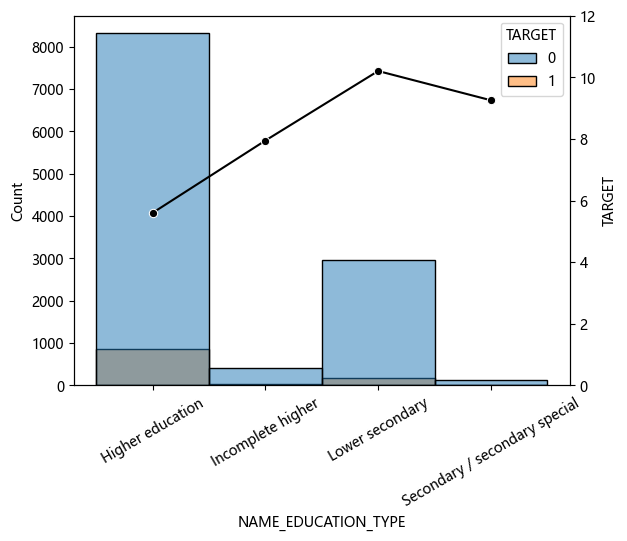

In [274]:
# 学历
edu_plt = (data[['TARGET', 'NAME_EDUCATION_TYPE']].groupby('NAME_EDUCATION_TYPE').mean() * 100).reset_index()
sns.histplot(x = 'NAME_EDUCATION_TYPE', hue = 'TARGET', data = data)
plt.xticks(rotation = 30)
ax = plt.gca()
ax2 = ax.twinx()
ax2 = sns.lineplot(x = 'NAME_EDUCATION_TYPE', y = 'TARGET', data = edu_plt, color = 'black', marker = 'o')
plt.ylim([0, 12]);

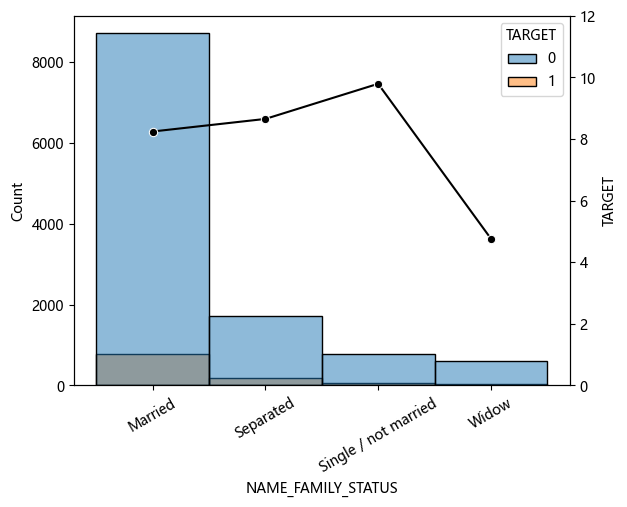

In [275]:
# 婚姻状况
mar_plt = (data[['TARGET', 'NAME_FAMILY_STATUS']].groupby('NAME_FAMILY_STATUS').mean() * 100).reset_index()
sns.histplot(x = 'NAME_FAMILY_STATUS', hue = 'TARGET', data = data)
plt.xticks(rotation = 30)
ax = plt.gca()
ax2 = ax.twinx()
ax2 = sns.lineplot(x = 'NAME_FAMILY_STATUS', y = 'TARGET', data = mar_plt, color = 'black', marker = 'o')
plt.ylim([0, 12]);

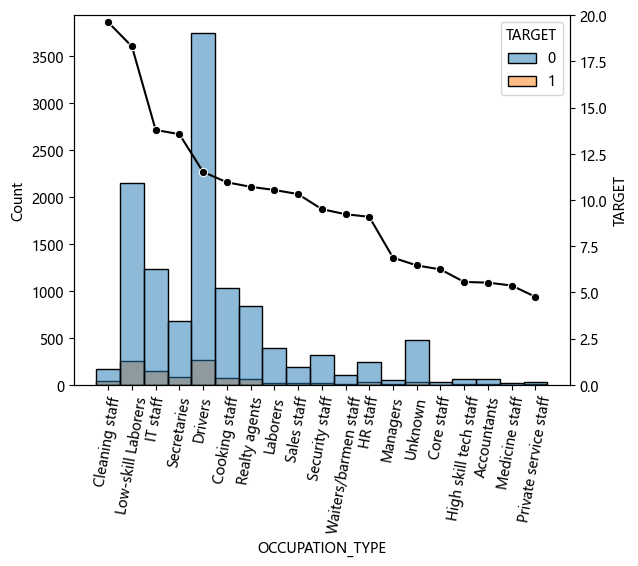

In [276]:
# 职业
ocu_plt = (data[['TARGET', 'OCCUPATION_TYPE']].groupby('OCCUPATION_TYPE').mean() * 100).reset_index()
ocu_plt.sort_values('TARGET', inplace = True, ascending = False)
sns.histplot(x = 'OCCUPATION_TYPE', hue = 'TARGET', data = data)
plt.xticks(rotation = 80)
ax = plt.gca()
ax2 = ax.twinx()
ax2 = sns.lineplot(x = 'OCCUPATION_TYPE', y = 'TARGET', data = ocu_plt, color = 'black', marker = 'o')
plt.ylim([0, 20]);

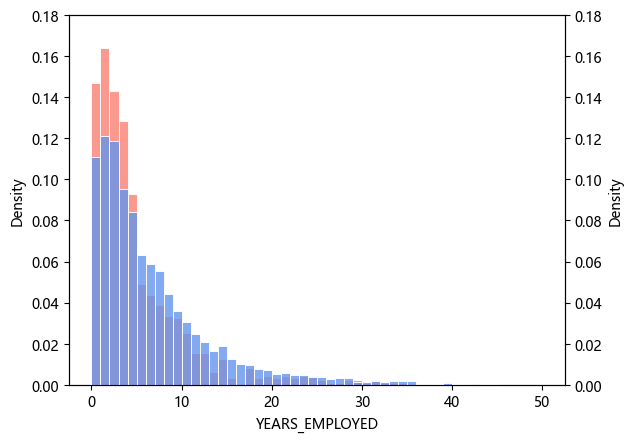

In [277]:
# 正常工龄
data_0 = data[data['TARGET'].eq(0)]
data_1 = data[data['TARGET'].eq(1)]
sns.histplot(data_1['YEARS_EMPLOYED'], alpha = 0.8, color = 'salmon', edgecolor = 'w', stat = 'density', binwidth = 1, binrange = (0, 50))
plt.ylim([0, 0.18])
ax = plt.gca()
ax2 = ax.twinx()
ax2 = sns.histplot(data_0['YEARS_EMPLOYED'], alpha = 0.8, color = 'cornflowerblue', edgecolor = 'w', stat = 'density', binwidth = 1, binrange = (0, 50))
plt.ylim([0, 0.18]);

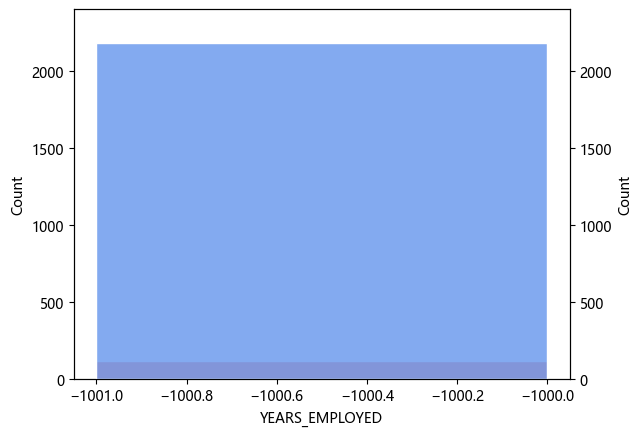

In [278]:
# 异常工龄
sns.histplot(data_1['YEARS_EMPLOYED'], alpha = 0.8, color = 'salmon', edgecolor = 'w', binrange = (-1001, -1000))
plt.ylim([0, 2400])
ax = plt.gca()
ax2 = ax.twinx()
ax2 = sns.histplot(data_0['YEARS_EMPLOYED'], alpha = 0.8, color = 'cornflowerblue', edgecolor = 'w', binrange = (-1001, -1000))
plt.ylim([0, 2400]);

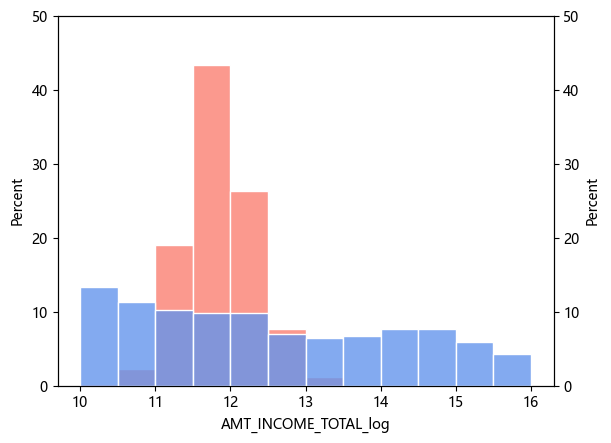

In [279]:
# 收入
sns.histplot(data_1['AMT_INCOME_TOTAL_log'], alpha = 0.8, color = 'salmon', edgecolor = 'w', stat = 'percent', binwidth = 0.5, binrange = (10, 16))
plt.ylim([0, 50])
ax = plt.gca()
ax2 = ax.twinx()
ax2 = sns.histplot(data_0['YEARS_EMPLOYED'], alpha = 0.8, color = 'cornflowerblue', edgecolor = 'w', stat = 'percent', binwidth = 0.5, binrange = (10, 16))
plt.ylim([0, 50]);

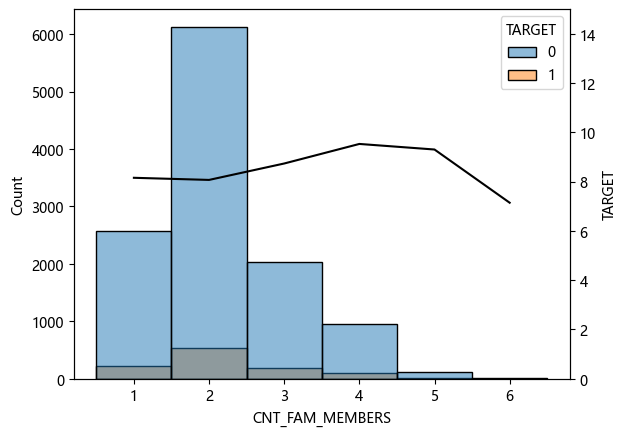

In [280]:
# 家庭成员数
fam_plt = (data[['TARGET', 'CNT_FAM_MEMBERS']].groupby('CNT_FAM_MEMBERS').mean() * 100).reset_index()
fam_plt.sort_values('TARGET', inplace = True, ascending = False)
sns.histplot(x = 'CNT_FAM_MEMBERS', hue = 'TARGET', data = data, binwidth = 1, binrange = (0.5, 6.5))
ax = plt.gca()
ax2 = ax.twinx()
ax2 = sns.lineplot(x = 'CNT_FAM_MEMBERS', y = 'TARGET', data = fam_plt, color = 'black')
plt.ylim([0, 15]);

## 第四部分 风险指标分析

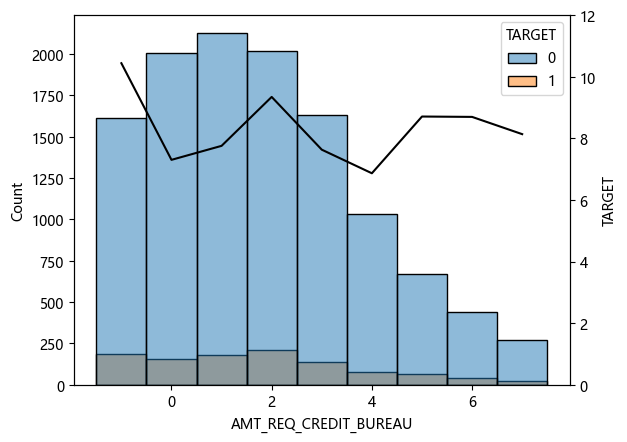

In [281]:
# 查询次数
inq_plt = (data[['TARGET', 'AMT_REQ_CREDIT_BUREAU']].groupby('AMT_REQ_CREDIT_BUREAU').mean() * 100).reset_index()
inq_plt.sort_values('TARGET', inplace = True, ascending = False)
sns.histplot(x = 'AMT_REQ_CREDIT_BUREAU', hue = 'TARGET', data = data, binwidth = 1, binrange = (-1.5, 7.5))
ax = plt.gca()
ax2 = ax.twinx()
ax2 = sns.lineplot(x = 'AMT_REQ_CREDIT_BUREAU', y = 'TARGET', data = inq_plt, color = 'black')
plt.ylim([0, 12]);

In [282]:
# 历史借款次数
history = data_application[['SK_ID_CURR', 'SK_ID_PREV']]
history = history.groupby('SK_ID_CURR').count().reset_index()
history = pd.merge(data, history, on = 'SK_ID_CURR', how = 'left')
history['SK_ID_PREV'].fillna(0, inplace = True)
history['SK_ID_PREV'].describe()
history = history[history['SK_ID_PREV'].le(6)]

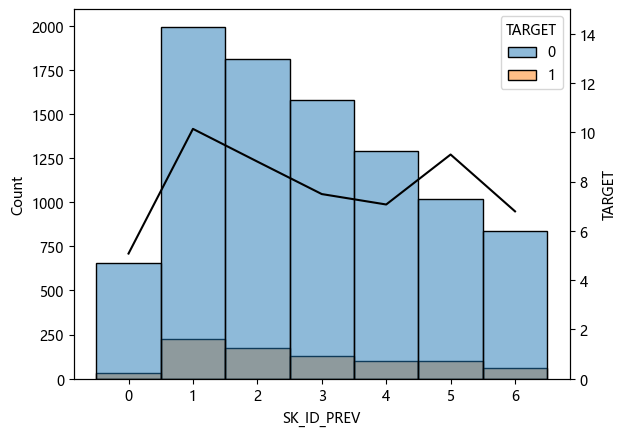

In [283]:
app_plt = (history[['TARGET', 'SK_ID_PREV']].groupby('SK_ID_PREV').mean() * 100).reset_index()
app_plt.sort_values('TARGET', inplace = True, ascending = False)
sns.histplot(x = 'SK_ID_PREV', hue = 'TARGET', data = history, binwidth = 1, binrange = (-0.5, 6.5))
ax = plt.gca()
ax2 = ax.twinx()
ax2 = sns.lineplot(x = 'SK_ID_PREV', y = 'TARGET', data = app_plt, color = 'black')
plt.ylim([0, 15]);

In [284]:
# 历史违约天数
payment = data_payment.groupby(['SK_ID_CURR', 'SK_ID_PREV', 'NUM_INSTALMENT_NUMBER'], as_index = False).agg({'DAYS_INSTALMENT' : ['mean'],
                                                         'DAYS_ENTRY_PAYMENT' : ['max'],
                                                         'AMT_INSTALMENT' : ['mean'], 
                                                         'AMT_PAYMENT' : 'sum'})
tem = [ ] 
for i in payment.columns.tolist():
    tem.append(i[0])
payment.columns = pd.Index(tem)
payment
payment['DEFAULT_DAY'] = payment['DAYS_ENTRY_PAYMENT'] - payment['DAYS_INSTALMENT']
#新增一列['DEFAULT_AMT'],表示每期逾期金额
payment['DEFAULT_AMT'] = payment['AMT_INSTALMENT'] - payment['AMT_PAYMENT']
#将未到期且尚未还款的记录的逾期天数标成0
payment['DEFAULT_DAY'][(payment['DAYS_INSTALMENT']> -30) & (payment['DAYS_ENTRY_PAYMENT'].isnull())] = 0
#将正常提前还款的记录的逾期天数标记成0
payment['DEFAULT_DAY'][payment['DEFAULT_DAY'].isnull()] = 0
#逾期天数大于0的记录
tem = payment[payment['DEFAULT_DAY'] > 0]
#逾期天数大于0的记录中，计算总天数和平均逾期天数
payment_days = tem.groupby('SK_ID_CURR', as_index = False).agg({'DEFAULT_DAY' : ['sum', 'mean']})
tem = [ ] 
tem.append('SK_ID_CURR')
for i in payment_days.columns.tolist():
     if i[0] != 'SK_ID_CURR':
        tem.append(i[0] + '_' + i[1])
payment_days.columns = pd.Index(tem)
payment_days

,SK_ID_CURR,DEFAULT_DAY_sum,DEFAULT_DAY_mean
0,100001,11.0,11.000000
1,100005,1.0,1.000000
2,100007,63.0,3.937500
3,100008,1317.0,1317.000000
4,100009,7.0,7.000000
...,...,...,...
179905,456248,93.0,23.250000
179906,456250,21.0,7.000000
179907,456252,3.0,3.000000
179908,456253,9.0,9.000000


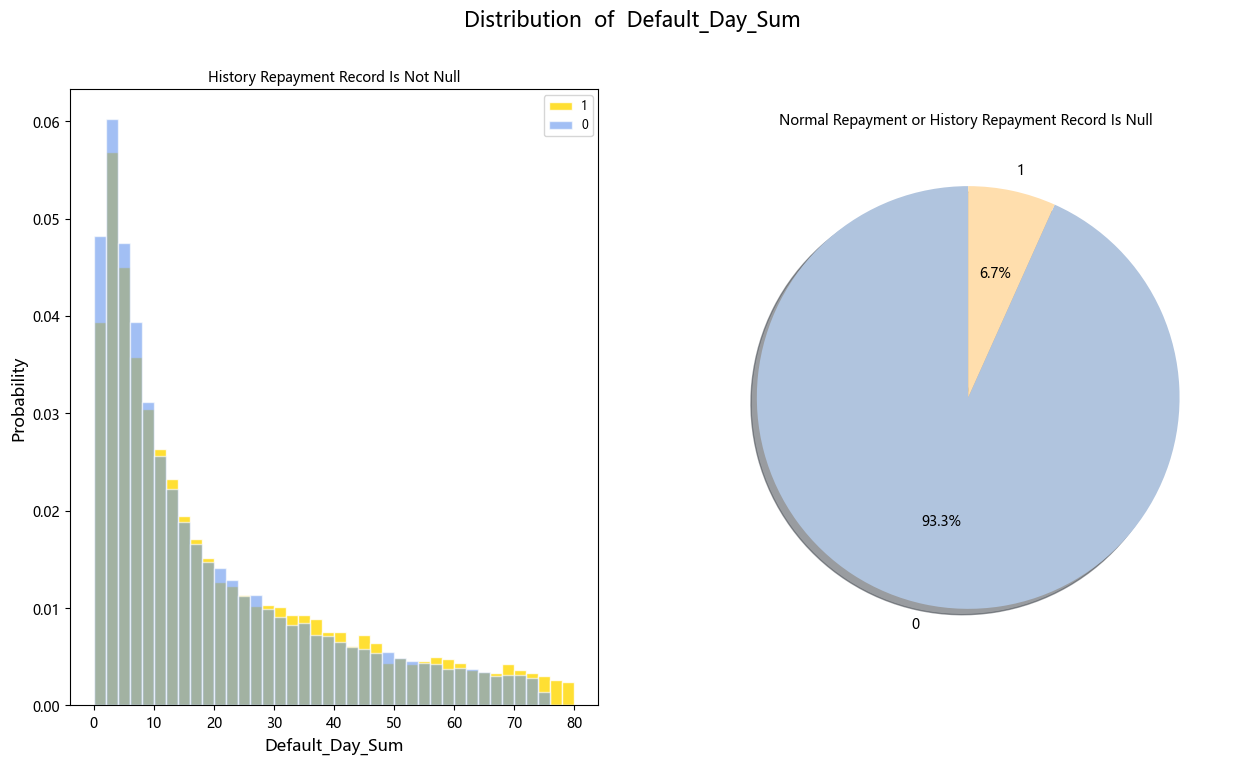

In [231]:
tem = data.loc[: , ['SK_ID_CURR','TARGET']].merge(payment_days, how = 'left', on = 'SK_ID_CURR')
#正常还款和无历史记录的用户记录
tem_nan = tem[tem['DEFAULT_DAY_sum'].isnull()]
tem_nan = tem_nan['TARGET'].value_counts().tolist()

#历史发生逾期的用户记录
tem1 = tem[~tem['DEFAULT_DAY_sum'].isnull()]
g1 = tem1[tem1['TARGET'] == 1]['DEFAULT_DAY_sum']
g0 = tem1[tem1['TARGET'] == 0]['DEFAULT_DAY_sum']
#历史发生逾期的用户记录中，分别取逾期和正常客户前80%数据
g1_80 = g1[g1<= np.percentile(g1, 80)]
g0_80 = g0[g0<= np.percentile(g0, 80)]
fig, ax = plt.subplots(1, 2, figsize =(15, 8))
#历史发生逾期的用户
ax[0].hist(g1_80.values, bins=range(0, 82, 2), label = '1', density = True, alpha = 0.8, color = 'gold', edgecolor = 'w',)
ax[0].hist(g0_80.values, bins=range(0, 82, 2), label = '0', density = True, alpha = 0.6, color = 'cornflowerblue', edgecolor = 'w')
ax[0].set_title('History Repayment Record Is Not Null', fontsize = 10)
ax[0].set_xlabel('Default_Day_Sum', fontsize = 12)
ax[0].set_ylabel('Probability', fontsize = 12)
ax[0].legend(fontsize = 'small')

#历史正常还款和无历史记录的用户
ax[1].pie(tem_nan, labels = ['0','1'], autopct= '%1.1f%%', startangle = 90 ,colors = ['lightsteelblue', 'navajowhite'], shadow = True )
ax[1].set_title('Normal Repayment or History Repayment Record Is Null ', fontsize = 10)
fig.suptitle('Distribution  of  Default_Day_Sum', fontsize = 15)
plt.show()